In [ ]:
import gym
import numpy as np
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
from google.colab import files
import math
import random
import time
import numpy as np

In [ ]:
!pip install kaggle_environments

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.8/953.8 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.1/134.1 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_

In [ ]:
from kaggle_environments import evaluate, make, utils
env = make("connectx", debug=True)
agent1 = 'random'
agent2 = 'negamax'

env.run([agent1, agent2])
env.render(mode="ipython", width=600, height=500, header=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = 'drive/MyDrive/RL/'


## MC policy iteration vs random agent

In [ ]:
def show(env):
  env.render(mode="ipython", width=600, height=500, header=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('yayyy')
original_stdout = sys.stdout

yayyy


In [ ]:
def random_episode(policy):
    env.reset()
    original_stdout = sys.stdout
    r1,r2 = 0,0
    current_state = tuple(np.zeros(42))
    states, actions, rewards = [current_state], [], []
    while r1 == 0 and r2 != None:
      if tuple(current_state) in policy:
        a1 = policy[tuple(current_state)]
      else:
        a1 = np.random.randint(0,7)
      a2 = np.random.randint(0,7)
      try:
        sys.stdout = open('/dev/null', 'w')
        e1 = env.step([a1,a2])
        sys.stdout = original_stdout
      except:
        r1,r2 = -0.5,-0.5
        break
      r1 = e1[0]['reward']
      r2 = e1[1]['reward']
      if r1 == 0 and r2!= None:
        sys.stdout = open('/dev/null', 'w')
        e = env.step([a1,a2])
        sys.stdout = original_stdout
        r1,r2 = e[0]['reward'],e[1]['reward']
        current_state = e[0]['observation']['board']
      if (r1 == None) or (r2 == None):
        r1,r2 = -0.5,-0.5
      else:
        r2 = -1*r1
        current_state = e1[0]['observation']['board']
      states.append(current_state)
      rewards.append(r1)
      actions.append(a1)
    sys.stdout = original_stdout
    return r1,r2, states, rewards, actions

In [ ]:
def MC( n = 100, g = 0.9 , eps = 0):
  policy = {}
  a_val = {}
  ret = {}
  for i in range (n):
    r1,r2,states,rewards,actions = random_episode(policy)
    T = len(actions)
    G = 0
    for t in range(T-1,-1,-1):
      G = g*G + rewards[t]

      if (tuple(states[t]),actions[t]) in ret:
        ret[(tuple(states[t]),actions[t])].append(G)
      else:
        ret[(tuple(states[t]),actions[t])] = [G]
      a_val[(tuple(states[t]),actions[t])] = np.mean(ret[(tuple(states[t]),actions[t])])
      max = -np.inf

      for a in range(7):
        if (tuple(states[t]),a) in a_val:
            try:
              if a_val[(tuple(states[t]),a)] > max:
                max = a_val[(tuple(states[t]),a)]
                policy[tuple(states[t])] = a
            except:
              print(a_val[(tuple(states[t]),a)],max)

      r = np.random.random()
      if tuple(states[t]) in policy:
        if r < eps:
          policy[tuple(states[t])] = np.random.randint(0,7)


  return policy

In [ ]:
policy = MC(100,0.9,0.8)

In [ ]:
print('yayy')

yayy


In [ ]:
len(policy)

605

In [ ]:
3**42

109418989131512359209

In [ ]:
c11,c21,c10,c20 = 0,0,0,0
for i in range(1000):
  r1,r2,_ ,r ,_  = random_episode(policy)

  if r1 == -1:
    c10 += 1
  if r2 == -1:
    c20 += 1
  if r1 == 1:
    c11 += 1
  if r2 == 1:
    c21 += 1
print("Number of wins by MC policy iteration :",c11)
print("Number of wins by random agent :",c21)
print("Number of draws :",c10-c21)



Number of wins by MC policy iteration : 456
Number of wins by random agent : 250
Number of draws : 294


In [ ]:
show(env)
#437 289

Trying for different values of n and gamma:

In [ ]:
n_values = [1000,10000,50000,100000]
gamma = [0.9]
data = {}
length = {}
for n in tqdm(n_values):
  for g in gamma:
    policy = MC(n,g, 0.8)
    c11,c21,c10,c20 = 0,0,0,0
    for i in range(100):
      r1,r2,_ ,r ,_  = random_episode(policy)
      if r1 == -1:
        c10 += 1
      if r2 == -1:
        c20 += 1
      if r1 == 1:
        c11 += 1
      if r2 == 1:
        c21 += 1
    data["n="+str(n)+", g="+str(g)] = (c11,c10-c21)
    length[n] = len(policy)

# x_values, y_values = zip(*data.items())
# num_bars = len(y_values[0])
# fig, ax = plt.subplots()
# bar_width = 0.1
# bar_gap = 0.1
# for i in range(num_bars):
#     x_positions = [x + (i/2) * (bar_width + bar_gap) for x in np.arange(len(x_values))]
#     ax.bar(x_positions, [y[i] for y in y_values], bar_width, label=f'Bar {i + 1}')
# ax.set_xlabel('Groups')
# ax.set_ylabel('Values')
# ax.set_title('Wins and draws by MC for different values of n and gamma')
# ax.set_xticks(np.arange(len(x_values)))
# ax.set_xticklabels(x_values, rotation=90, ha='center')

# # Add legend
# ax.legend()

# # Show the plot
# plt.show()
print(data)
print(length)



100%|██████████| 4/4 [2:42:18<00:00, 2434.50s/it]

{'n=1000, g=0.9': (51, 0), 'n=10000, g=0.9': (48, 0), 'n=50000, g=0.9': (51, 0), 'n=100000, g=0.9': (59, 0)}
{1000: 6934, 10000: 61207, 50000: 266279, 100000: 497924}


In [ ]:
print(data,length)

{'n=1000, g=0.9': (51, 0), 'n=10000, g=0.9': (48, 0), 'n=50000, g=0.9': (51, 0), 'n=100000, g=0.9': (59, 0)} {1000: 6934, 10000: 61207, 50000: 266279, 100000: 497924}


100%|██████████| 5/5 [34:30<00:00, 414.15s/it]


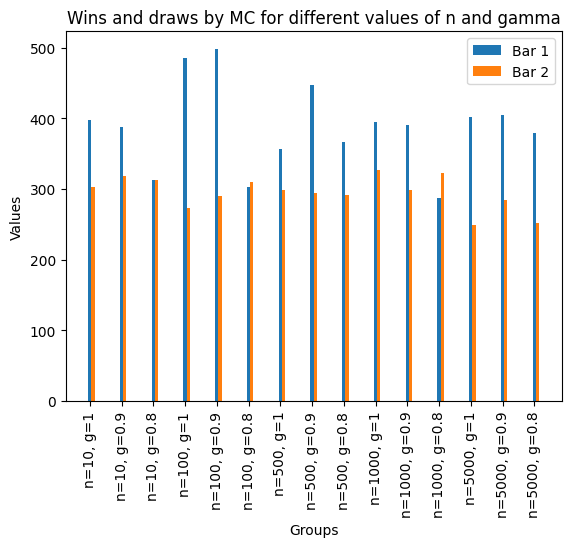

In [ ]:
n_values = [10,100,500,1000,5000]
gamma = [1,0.9,0.8]
data = {}
for n in tqdm(n_values):
  for g in gamma:
    policy = MC(n,g)
    c11,c21,c10,c20 = 0,0,0,0
    for i in range(1000):
      r1,r2,_ ,r ,_  = random_episode(policy)
      if r1 == -1:
        c10 += 1
      if r2 == -1:
        c20 += 1
      if r1 == 1:
        c11 += 1
      if r2 == 1:
        c21 += 1
    data["n="+str(n)+", g="+str(g)] = (c11,c10-c21)

x_values, y_values = zip(*data.items())
num_bars = len(y_values[0])
fig, ax = plt.subplots()
bar_width = 0.1
bar_gap = 0.1
for i in range(num_bars):
    x_positions = [x + (i/2) * (bar_width + bar_gap) for x in np.arange(len(x_values))]
    ax.bar(x_positions, [y[i] for y in y_values], bar_width, label=f'Bar {i + 1}')
ax.set_xlabel('Groups')
ax.set_ylabel('Values')
ax.set_title('Wins and draws by MC for different values of n and gamma')
ax.set_xticks(np.arange(len(x_values)))
ax.set_xticklabels(x_values, rotation=90, ha='center')

# Add legend
ax.legend()

# Show the plot
plt.show()



## **SARSA** vs random agent

In [ ]:
def checkdraw(e ,r1 ,r2):
  c = 0
  for i in e[0]['observation']['board']:
    if i == 0:
      c += 1
  if c == 0:
    return -0.5,-0.5
  return r1,r2

In [ ]:
def SARSA(n = 100, g = 0.9 , eps = 0.8 , alpha = 0.1):
  policy = {}
  a_val = {}
  for i in range (n):
    env.reset()
    original_stdout = sys.stdout
    r1,r2 = 0,0
    current_state = tuple(np.zeros(42))
    r = np.random.random()
    a11 = np.random.randint(7)
    if r > eps:
      max_val = -np.inf
      for j in range(7):
        if (current_state,j) in a_val :
          if a_val[(current_state,j)] > max_val:
            max_val = a_val[(current_state,j)]
            a11 = j
    while r1 == 0 and r2 == 0:
        a12 = np.random.randint(0,7)
        sys.stdout = open('/dev/null', 'w')
        e = env.step([a11,a12])
        sys.stdout = original_stdout

        r1 = e[0]['reward']
        r2 = e[1]['reward']
        if r1 == 0 and r2!= None:
          sys.stdout = open('/dev/null', 'w')
          e = env.step([a11,a12])
          sys.stdout = original_stdout
          r1,r2 = e[0]['reward'],e[1]['reward']
          new_state = tuple(e[0]['observation']['board'])
        if (r1 == None) or (r2 == None):
          r1,r2 = checkdraw(e ,r1 ,r2)
          if r1 == None:
            r1,r2 = -1,0
          elif r2 == None :
            r1,r2 = 0,-1

        else:
          new_state = tuple(e[0]['observation']['board'])
        r = np.random.random()
        a21 = np.random.randint(0,7)
        if r > eps:
          max_val = -np.inf
          for j in range(7):
            if (new_state,j) in a_val :
              if a_val[(new_state,j)] > max_val:
                max_val = a_val[(new_state,j)]
                a21 = j
        if (tuple(current_state),a11) not in a_val :
            a_val[(tuple(current_state),a11)] = 0
        if (tuple(new_state),a21) not in a_val :
            a_val[tuple(new_state),a21] = 0
        a_val[(tuple(current_state),a11)] = a_val[(tuple(current_state),a11)] + alpha*(r1 + g*a_val[(tuple(new_state),a21)] - a_val[tuple(current_state),a11])
        current_state = new_state
        a11 = a21
  for i in list(a_val.keys()):
      s = i[0]
      max_a,a = -np.inf , np.random.randint(0,7)
      for j in range(7):
        if (s,j) in a_val:
          if a_val[(s,j)] > max_a:
            max_a = a_val[(s,j)]
            a = j
      r = np.random.random()
      if r < eps :
        policy[s] = np.random.randint(0,7)
      else:
        policy[s] = a

  return policy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
list({0:'a',1:'b'}.keys())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0, 1]

In [ ]:
p_100000 = SARSA(100000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(p_100000)

637508

In [ ]:
with open('p_100000.pkl', 'wb') as file:
    pickle.dump(p_100000, file)
files.download('p_100000.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model Performance

In [ ]:
with open(path+'p_100000.pkl', 'rb') as f:
    SARSA_random = pickle.load(f)
with open(path+'p_Q_100000.pkl', 'rb') as f:
    Q_random = pickle.load(f)
with open(path+'p_Q_nega_10000.pkl', 'rb') as f:
    Q_nega = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: incomplete input (<ipython-input-9-fd2a8725e899>, line 1)

In [ ]:
class agent():
  def __init__(self, policy):
    self.length = 0
    self.policy = policy
    self.states = []
    self.actions = []
  def __call__(self, observation, configuration):
    self.length += 1
    self.states.append(tuple(observation.board))
    action = np.random.randint(0,7)
    if tuple(observation.board) in self.policy:
      action = self.policy[tuple(observation.board)]
    self.actions.append(action)
    return action

SARSA_random_agent = agent(SARSA_random)
Q_random_agent = agent(Q_random)
Q_nega_agent = agent(Q_nega)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
env.reset()
env.run(['random','negamax'])
env.state[0]['reward']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-1

In [ ]:
env.state[1]

{'action': 4,
 'reward': 1,
 'info': {},
 'observation': {'remainingOverageTime': 60, 'mark': 2},
 'status': 'DONE'}

Pitting against random agent

In [ ]:
m1 ,m2 ,m3 = [0,0,0],[0,0,0],[0,0,0] #[wins, draws, losses]

def compete(agent1,agent2,m):
  env.reset()
  original_stdout = sys.stdout
  sys.stdout = open('/dev/null', 'w')
  env.run([agent1,agent2])
  sys.stdout = original_stdout
  r1,r2 = env.state[0]['reward'],env.state[1]['reward']
  if r1 == 1:
    m[0] += 1
  elif r2 == 1:
    m[1] += 1
  else:
    m[2] += 1
  return m

for i in tqdm(range(1000)):
  m1 = compete(SARSA_random_agent,'random',m1)
  m2 = compete(Q_random_agent,'random',m2)
  m3 = compete(Q_nega_agent,'random',m3)

print(m1,m2,m3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 1000/1000 [04:51<00:00,  3.43it/s]

[442, 347, 211] [597, 238, 165] [446, 343, 211]


In [ ]:
for i in tqdm(range(1000)):
  m1 = compete(SARSA_random_agent,'negamax',m1)
  m2 = compete(Q_random_agent,'negamax',m2)
  m3 = compete(Q_nega_agent,'negamax',m3)

print(m1,m2,m3)

100%|██████████| 1000/1000 [53:03<00:00,  3.18s/it]

[448, 1212, 340] [607, 1040, 353] [451, 1186, 363]


In [ ]:
print(np.array(m1)-np.array([442,347,211]),np.array(m2)-np.array([597,238,165]),np.array(m3)-np.array([446,343,211]))

[  6 865 129] [ 10 802 188] [  5 843 152]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
